# Re-admission of diabetes patients: Exploring the effect of medication change toward the diabetes patients in US
<br>

## Introduction

One of the most common uncurable disease is __*diabetes*__ because it is a chronic disease. However, there is a treatment for diabetes such as insulin(most common medication) or Rosiglitazone, glyburide, etc for a more specific type 2 diabetes medication.
After being released with the same medication the patients have been taking, the patients are still being readmitted back to the hospital. To improve the quality of healthcare, it is important to reduce early hospital admission.

In order to study what cause the high number readmission, I want to explore whether a change of medication will affect the number of readmission, and other factor that might cause the patients to readmit.
This is to examine the historical patterns of diabetes care within a huger clinical database of diabetes patients admitted to a US hospital and to inform the future directions towards improving patient safety.

## Aims and Objectives

In this project, I would like to explore the following:

- Which gender have a higher counts of diabetes
    - Does race play a part?
    - Does age play a part?
    - Does gender play a part?
<br>
<br>
- Does types of admission affect the time spent in hospital?<br>
<br>
- Are they discharged with medication?
<br>
<br>
- With a change of medication, are they being readmitted back?
    - If yes, within how many days? 
        - Ages and Gender
    - If no, are they readmitted back?
        - If yes, within how many days?
        - Ages and gender
    - Find which age group, gender, race has the highest readmission rate.

## Disadvantages of the data

1. Not all of the information are filled, making it incomplete. The information of the dataset might not be 100% accurate. When the information is not incomplete, the results of these studies ,ay not be conclusive or generalizable.
<br><br>
2. The information are only focused on a hospitals in one country(United States). As a result, it is unlikely that this research can be generalized to the healthcare systems in other countries due to its narrow geographical horizon. There can be a great deal of variation between countries and healthcare systems when it comes to healthcare practices, patient demographics, and healthcare outcomes.
<br><br>
3. The Data coverage is limited to the time period 1999-2008 only. In light of the fact that healthcare practices and patient demographics are constantly changing and evolving, the patterns or the finding observed and analysed in this dataset may not be relevant to the current state of healthcare of diabetes.
<br><br>


## Ethics Consideration

### Use of the data

The data from **_UC Irvine Machine Learning Repository_** had donated this data on 5/2/2014, thus allowing us to use the data inside accordingly. The license states that *'This dataset is licensed under a **Creative Commons Attribution 4.0 International** (CC BY 4.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given'*. This means that the data is allowed to be used as long as there a credit given to the appropriate author/owner.



In [1]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [8]:
import sys
import os # create and remove a folder, identify the current folder
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests



## ID numbers for types of admission to the hospital

Typed of admission the patients are being admitted for

In [5]:
idMap_df = pd.read_csv('id_mapping.csv')
idMap_df.head(8)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


## ID for types of Discharge

Types of discharge ID that the patients are being discharged for (with reasons)

In [8]:
discharge = 'discharge_disposition_id'
idMap_df.columns.values[0] = discharge
print(discharge)
idMap_df.iloc[9:39]

discharge_disposition_id


,discharge_disposition_id,description
9,1,Discharged to home
10,2,Discharged/transferred to another short term h...
11,3,Discharged/transferred to SNF
12,4,Discharged/transferred to ICF
13,5,Discharged/transferred to another type of inpa...
14,6,Discharged/transferred to home with home healt...
15,7,Left AMA
16,8,Discharged/transferred to home under care of H...
17,9,Admitted as an inpatient to this hospital
18,10,Neonate discharged to another hospital for neo...


## ID for source of Admission

Types of admission that the patients are referred to

In [7]:
source = 'admission_source_id'
idMap_df.columns.values[0] = source
print(source)
idMap_df.iloc[40:65]

admission_source_id


,admission_source_id,description
40,1,Physician Referral
41,2,Clinic Referral
42,3,HMO Referral
43,4,Transfer from a hospital
44,5,Transfer from a Skilled Nursing Facility (SNF)
45,6,Transfer from another health care facility
46,7,Emergency Room
47,8,Court/Law Enforcement
48,9,Not Available
49,10,Transfer from critial access hospital


## Diabetic patients information

In [2]:
diabetic_df = pd.read_csv('diabetic_data.csv')
diabetic_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


### Comparing the diabetes patients between males and females

Comparing the __*gender*__ to see who are more prone to get admitted to the hospital due to diabetes (in general). 
Also comparing if race plays a part to them being admitted.
<br>
How does it play a part?
 - Bodyweight
 - It may due to them having more body fat compared to other races
 - Diet and lifestyle of the patients
 - Genes


In [90]:
# Comparing the number of female and male who get admitted to the hospital due to diabetes.
# Does more male get diabetes or female?
# Does race play a part?

race_And_Gender = diabetic_df.groupby(['race', 'gender']).size().reset_index(name='total')

race_And_Gender


,race,gender,total
0,?,Female,1133
1,?,Male,1138
2,?,Unknown/Invalid,2
3,AfricanAmerican,Female,11728
4,AfricanAmerican,Male,7482
5,Asian,Female,318
6,Asian,Male,323
7,Caucasian,Female,39689
8,Caucasian,Male,36410
9,Hispanic,Female,1092


In [85]:
Gender_age = diabetic_df.groupby(['gender','age']).size().reset_index(name='total')
Gender_age

,gender,age,total
0,Female,[0-10),83
1,Female,[10-20),402
2,Female,[20-30),1114
3,Female,[30-40),2162
4,Female,[40-50),4811
5,Female,[50-60),8572
6,Female,[60-70),11061
7,Female,[70-80),13985
8,Female,[80-90),10515
9,Female,[90-100),2003


In [14]:
# find the data with the highest count
most_num = Gender_age['total'].max()
most_num1 = race_And_Gender['total'].max()

# only extract the row with the highest number
most_num_count = Gender_age[Gender_age['total'] == most_num]
most_num_count1 = race_And_Gender[race_And_Gender['total'] == most_num1]

# the highest num (age and gender)
print(most_num_count)
(most_num_count1)


   gender      age  total
7  Female  [70-80)  13985


,race,gender,total
7,Caucasian,Female,39689


## Types of Admission - Time spent in hospital

Finding out if the types of patients being admitted to the hospital *affect* the time spent in hospital.
 - Does the __severity__ play a part? For example:
     - Emergency (ID: 1) = severe
     - Urgent (ID: 2)  = slightly severe
     - etc
<br>

The average time spent in hospital


In [3]:
# full details of the time spent in hospital for types patients being admitted
admission_time = diabetic_df.groupby(['admission_type_id', 'time_in_hospital']).size().reset_index(name='total')

admission_type = admission_time.pivot(index = ['admission_type_id'],
                                     columns = ['time_in_hospital'],
                                     values = ['total'])
# excluding rows with NaN

admission_na = admission_type.dropna()
admission_na

total                                                  \
time_in_hospital       1       2       3       4       5       6       7    
admission_type_id                                                           
1                  6749.0  9682.0  9611.0  7642.0  5462.0  3966.0  3075.0   
2                  2356.0  3004.0  3057.0  2456.0  1805.0  1458.0  1211.0   
3                  3445.0  2848.0  3143.0  2412.0  1754.0  1349.0  1051.0   
5                   808.0   776.0  1016.0   708.0   446.0   304.0   215.0   
6                   688.0   875.0   882.0   686.0   484.0   450.0   290.0   
8                   158.0    33.0    41.0    17.0    12.0    10.0    16.0   

                                                                       
time_in_hospital       8       9       10     11     12     13     14  
admission_type_id                                                      
1                  2224.0  1577.0  1231.0  916.0  748.0  607.0  500.0  
2                   877.0   597.0   489.0  426.0  267.0  250.0  227.0  
3                   832.0   521.0   407.0  339.0  286.0  240.0  242.0  
5                   154.0   110.0    67.0   64.0   53.0   40.0   24.0  
6                   295.0   186.0   141.0  106.0   91.0   69.0   48.0  
8                     6.0    10.0     6.0    3.0    3.0    4.0    1.0

In [16]:
# finding the avg time spent in hospital for each types of admission
admission_type.transpose().describe()

admission_type_id,1,2,3,4,5,6,7,8
count,14.000000,14.000000,14.000000,5.000000,14.000000,14.000000,11.000000,14.000000
mean,3856.428571,1320.000000,1347.785714,2.000000,341.785714,377.928571,1.909091,22.857143
std,3372.247954,1042.928569,1166.423408,1.414214,344.188942,300.871673,1.044466,40.587715
min,500.000000,227.000000,240.000000,1.000000,24.000000,48.000000,1.000000,1.000000
25%,994.750000,441.750000,356.000000,1.000000,64.750000,114.750000,1.000000,4.500000
50%,2649.500000,1044.000000,941.500000,1.000000,184.500000,292.500000,2.000000,10.000000
75%,6427.250000,2218.250000,2247.500000,3.000000,642.500000,635.500000,2.500000,16.750000
max,9682.000000,3057.000000,3445.000000,4.000000,1016.000000,882.000000,4.000000,158.000000


## Types of Discharge and Source of Admission - Days spent in hospital

Explore and analyse if the time spent in hospital affect the type of discharge for patients.
- Finding out most are discharged under which category
<br>

Explore what made the patients to be admitted to the hospital for diabetes.
Example:
- For babies, born outside the hospital
- For elderlies, transferred from hospice
- etc

In [55]:
discharge_time = diabetic_df.groupby(['discharge_disposition_id', 'time_in_hospital']).size().reset_index(name='total')

discharge_type = discharge_time.pivot(index = ['discharge_disposition_id'],
                                     columns = ['time_in_hospital'],
                                     values = ['total'])

discharge_type

total                                            \
time_in_hospital               1        2        3       4       5       6    
discharge_disposition_id                                                      
1                         11299.0  12930.0  11103.0  7990.0  5156.0  3505.0   
2                           538.0    406.0    307.0   236.0   154.0   120.0   
3                           417.0    855.0   2473.0  2149.0  1784.0  1504.0   
4                            62.0    118.0    104.0   116.0   102.0    74.0   
5                            86.0    104.0    184.0   149.0   129.0   135.0   
6                           592.0   1504.0   2003.0  1938.0  1519.0  1331.0   
7                           238.0    129.0     95.0    50.0    30.0    29.0   
8                             2.0      4.0     12.0    16.0    15.0     8.0   
9                             4.0      2.0      2.0     3.0     1.0     2.0   
10                            NaN      NaN      1.0     1.0     1.0     NaN   
11                          323.0    248.0    210.0   148.0   131.0   114.0   
12                            1.0      NaN      NaN     1.0     NaN     1.0   
13                           13.0     37.0     64.0    47.0    51.0    35.0   
14                           41.0     48.0     50.0    44.0    34.0    35.0   
15                            NaN      1.0      8.0    10.0    12.0     4.0   
16                            NaN      4.0      2.0     1.0     2.0     NaN   
17                            NaN      1.0      2.0     3.0     4.0     NaN   
18                          364.0    476.0    507.0   497.0   423.0   323.0   
19                            6.0      NaN      NaN     1.0     1.0     NaN   
20                            1.0      NaN      NaN     NaN     NaN     NaN   
22                           31.0    132.0    353.0   330.0   267.0   207.0   
23                           16.0     27.0     41.0    38.0    37.0    32.0   
24                            5.0     11.0      8.0     6.0     9.0     2.0   
25                          147.0    159.0    198.0   131.0    91.0    66.0   
27                            NaN      NaN      1.0     1.0     NaN     NaN   
28                           22.0     28.0     28.0    18.0    13.0    12.0   

                                                                              \
time_in_hospital              7       8       9      10     11     12     13   
discharge_disposition_id                                                       
1                         2608.0  1876.0  1144.0  867.0  625.0  455.0  363.0   
2                           87.0    58.0    61.0   37.0   42.0   32.0   23.0   
3                         1255.0   924.0   673.0  525.0  436.0  365.0  315.0   
4                           51.0    36.0    37.0   27.0   26.0   24.0   17.0   
5                           95.0    69.0    55.0   50.0   38.0   33.0   30.0   
6                         1042.0   836.0   578.0  467.0  379.0  278.0  245.0   
7                           19.0     7.0     6.0    9.0    5.0    3.0    2.0   
8                           10.0     7.0     6.0    9.0    6.0    3.0    6.0   
9                            3.0     3.0     1.0    NaN    NaN    NaN    NaN   
10                           NaN     2.0     1.0    NaN    NaN    NaN    NaN   
11                         115.0    67.0    75.0   52.0   46.0   47.0   37.0   
12                           NaN     NaN     NaN    NaN    NaN    NaN    NaN   
13                          29.0    33.0    30.0   14.0   18.0    9.0    9.0   
14                          19.0    19.0    18.0   14.0   21.0    9.0   12.0   
15                           9.0     6.0     3.0    3.0    2.0    3.0    1.0   
16                           1.0     NaN     1.0    NaN    NaN    NaN    NaN   
17                           1.0     NaN     NaN    1.0    NaN    1.0    NaN   
18                         253.0   218.0   153.0  128.0  110.0   92.0   79.0   
19                           NaN     NaN     NaN    NaN 

In [66]:
admission_source_time = diabetic_df.groupby(['admission_source_id', 'time_in_hospital']).size().reset_index(name='total')

admission_source_type = admission_source_time.pivot(index = ['admission_source_id'],
                                     columns = ['time_in_hospital'],
                                     values = ['total'])

admission_source_type


total                                                    \
time_in_hospital         1        2        3       4       5       6       7    
admission_source_id                                                             
1                    5047.0   4715.0   5151.0  3992.0  2682.0  2079.0  1700.0   
2                     159.0    166.0    157.0   154.0   115.0    85.0    66.0   
3                      15.0     24.0     37.0    35.0    17.0    13.0    11.0   
4                     281.0    402.0    398.0   331.0   292.0   250.0   241.0   
5                      41.0     86.0    116.0   115.0    89.0    95.0    81.0   
6                     249.0    392.0    402.0   348.0   240.0   189.0   126.0   
7                    7303.0  10212.0  10184.0  7963.0  5840.0  4318.0  3293.0   
8                       4.0      3.0      1.0     NaN     1.0     NaN     NaN   
9                      22.0     31.0     27.0    16.0    10.0     4.0     8.0   
10                      1.0      3.0      1.0     NaN     NaN     NaN     1.0   
11                      NaN      1.0      1.0     NaN     NaN     NaN     NaN   
13                      NaN      NaN      1.0     NaN     NaN     NaN     NaN   
14                      NaN      NaN      2.0     NaN     NaN     NaN     NaN   
17                   1058.0   1172.0   1257.0   942.0   662.0   489.0   326.0   
20                     27.0     17.0     21.0    27.0    18.0    17.0     5.0   
22                      1.0      NaN      NaN     NaN     NaN     NaN     1.0   
25                      NaN      NaN      NaN     1.0     NaN     NaN     NaN   

                                                                         
time_in_hospital         8       9       10     11     12     13     14  
admission_source_id                                                      
1                    1307.0   770.0   564.0  506.0  386.0  348.0  318.0  
2                      59.0    33.0    31.0   31.0   18.0    9.0   21.0  
3                      11.0     6.0     8.0    2.0    3.0    2.0    3.0  
4                     225.0   171.0   178.0  138.0   93.0   90.0   97.0  
5                      57.0    45.0    38.0   27.0   23.0   21.0   21.0  
6                      95.0    64.0    44.0   43.0   29.0   25.0   18.0  
7                    2367.0  1725.0  1333.0  983.0  808.0  644.0  521.0  
8                       2.0     1.0     1.0    1.0    1.0    1.0    NaN  
9                       3.0     NaN     1.0    2.0    1.0    NaN    NaN  
10                      1.0     NaN     1.0    NaN    NaN    NaN    NaN  
11                      NaN     NaN     NaN    NaN    NaN    NaN    NaN  
13                      NaN     NaN     NaN    NaN    NaN    NaN    NaN  
14                      NaN     NaN     NaN    NaN    NaN    NaN    NaN  
17                    251.0   180.0   139.0  114.0   83.0   67.0   41.0  
20                     11.0     5.0     3.0    7.0    1.0    2.0    NaN  
22                      1.0     2.0     1.0    1.0    2.0    1.0    2.0  
25                      1.0     NaN     NaN    NaN    NaN    NaN    NaN

## Administration of medication during admission and after discharged from the hospital
Analysing if the patients are being _prescribed_ with the __same medication__ of if there are some changes whether it increase its dosage of the same medication or there is a __change of medication.__ 
<br>
When discharged, are the patients prescribed with the same medication or there's a change of medication.   

In [4]:
# diabetic medication that were administered (Down, Up, Steady) 
# no medication administered when admitted (No)

diabetic_meds = diabetic_df[['metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed']]
diabetic_meds

,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed
0,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,Up,Ch,Yes
2,No,No,No,Steady,No,No,No,No,No,Yes
3,No,No,No,No,No,No,No,Up,Ch,Yes
4,No,No,No,Steady,No,No,No,Steady,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...
101761,Steady,No,No,No,No,No,No,Down,Ch,Yes
101762,No,No,No,No,No,No,No,Steady,No,Yes
101763,Steady,No,No,No,No,No,No,Down,Ch,Yes
101764,No,No,No,Steady,No,Steady,No,Up,Ch,Yes


In [27]:
metformin = {
    'Prescribed': ['No', 'Up', 'Down', 'Steady'],
    'Total': [metformin_no, metformin_up, metformin_down, metformin_steady] 
}

print("Data for Metformin(type 2 diabetic medication)")

metformin_dose = pd.DataFrame(metformin)
metformin_dose

Data for Metformin(type 2 diabetic medication)


,Prescribed,Total
0,No,81778
1,Up,1067
2,Down,575
3,Steady,18346


In [32]:
# finding how many people are prescribed with the medicine or is there a change of dosage of the diabetic medication when the person was being admitted
# during encounter 

repaglinide_no = diabetic_meds['repaglinide'].value_counts()['No']
repaglinide_up = diabetic_meds['repaglinide'].value_counts()['Up']
repaglinide_down = diabetic_meds['repaglinide'].value_counts()['Down']
repaglinide_steady = diabetic_meds['repaglinide'].value_counts()['Steady']

glimepiride_no = diabetic_meds['glimepiride'].value_counts()['No']
glimepiride_up = diabetic_meds['glimepiride'].value_counts()['Up']
glimepiride_down = diabetic_meds['glimepiride'].value_counts()['Down']
glimepiride_steady = diabetic_meds['glimepiride'].value_counts()['Steady']

glipizide_no = diabetic_meds['glipizide'].value_counts()['No']
glipizide_up = diabetic_meds['glipizide'].value_counts()['Up']
glipizide_down = diabetic_meds['glipizide'].value_counts()['Down']
glipizide_steady = diabetic_meds['glipizide'].value_counts()['Steady']

glyburide_no = diabetic_meds['glyburide'].value_counts()['No']
glyburide_up = diabetic_meds['glyburide'].value_counts()['Up']
glyburide_down = diabetic_meds['glyburide'].value_counts()['Down']
glyburide_steady = diabetic_meds['glyburide'].value_counts()['Steady']

pioglitazone_no = diabetic_meds['pioglitazone'].value_counts()['No']
pioglitazone_up = diabetic_meds['pioglitazone'].value_counts()['Up']
pioglitazone_down = diabetic_meds['pioglitazone'].value_counts()['Down']
pioglitazone_steady = diabetic_meds['pioglitazone'].value_counts()['Steady']

rosiglitazone_no = diabetic_meds['rosiglitazone'].value_counts()['No']
rosiglitazone_up = diabetic_meds['rosiglitazone'].value_counts()['Up']
rosiglitazone_down = diabetic_meds['rosiglitazone'].value_counts()['Down']
rosiglitazone_steady = diabetic_meds['rosiglitazone'].value_counts()['Steady']

insulin_no = diabetic_meds['insulin'].value_counts()['No']
insulin_up = diabetic_meds['insulin'].value_counts()['Up']
insulin_down = diabetic_meds['insulin'].value_counts()['Down']
insulin_steady = diabetic_meds['insulin'].value_counts()['Steady']

#repaglinide
print("Data for repaglinide(type 2):")
print("No:", repaglinide_no)
print("Up:", repaglinide_up)
print("Down:", repaglinide_down)
print("Steady:", repaglinide_steady)
print(" ")
# glimepiride
print("Data for glimepiride(type 2):")
print("No:", glimepiride_no)
print("Up:", glimepiride_up)
print("Down:", glimepiride_down)
print("Steady:", glimepiride_steady)
print(" ")
#glipizide
print("Data for glipizide(type 2):")
print("No:", glipizide_no)
print("Up:", glipizide_up)
print("Down:", glipizide_down)
print("Steady:", glipizide_steady)
print(" ")
#glyburide
print("Data for glyburide(type 2):")
print("No:", glyburide_no)
print("Up:", glyburide_up)
print("Down:", glyburide_down)
print("Steady:", glyburide_steady)
print(" ")
#pioglitazone
print("Data for pioglitazone(type 2):")
print("No:", pioglitazone_no)
print("Up:", pioglitazone_up)
print("Down:", pioglitazone_down)
print("Steady:", pioglitazone_steady)
print(" ")
#rosiglitazonrosiglitazone
print("Data for rosiglitazone(type 2):")
print("No:", rosiglitazone_no)
print("Up:", rosiglitazone_up)
print("Down:", rosiglitazone_down)
print("Steady:", rosiglitazone_steady)
print(" ")
#insulin
print("Data for insulin(type 1):")
print("No:", insulin_no)
print("Up:", insulin_up)
print("Down:",  insulin_down)
print("Steady:", insulin_steady)

Data for repaglinide(type 2):
No: 100227
Up: 110
Down: 45
Steady: 1384
 
Data for glimepiride(type 2):
No: 96575
Up: 327
Down: 194
Steady: 4670
 
Data for glipizide(type 2):
No: 89080
Up: 770
Down: 560
Steady: 11356
 
Data for glyburide(type 2):
No: 91116
Up: 812
Down: 564
Steady: 9274
 
Data for pioglitazone(type 2):
No: 94438
Up: 234
Down: 118
Steady: 6976
 
Data for rosiglitazone(type 2):
No: 95401
Up: 178
Down: 87
Steady: 6100
 
Data for insulin(type 1):
No: 47383
Up: 11316
Down: 12218
Steady: 30849


In [55]:
# indicateing if there was any diabetic medication prescribed
diabetesMed = {
    'Prescribed': ['No', 'Yes'],
    'Total': [medicine, no_medicine] 
}

print("Medicine prescribed: ")

meds = pd.DataFrame(diabetesMed)
meds

Medicine prescribed: 


,Prescribed,Total
0,No,78363
1,Yes,23403


In [67]:
# Indicating if there was a change in diabetic medication(dosage/change of medicine)
change = diabetic_df['change'].value_counts()['Ch']
no_change = diabetic_df['change'].value_counts()['No']

print("Medicine changed:", change)
print("No Medicine changed:", no_change)

Medicine changed: 47011
No Medicine changed: 54755


In [73]:
## data for change of medicine and the prescription of medicine
medication = diabetic_df.groupby(['change', 'diabetesMed']).size().reset_index(name='total')
medication


,change,diabetesMed,total
0,Ch,Yes,47011
1,No,No,23403
2,No,Yes,31352


## No of diagnoses

Exploring the number of diagnoses on a patient and analysing if:
- More diagnoses = More time spent in hospital?
- Does age, race and gender affect the number of diagnoses ?

In [5]:
diagnose_time = diabetic_df.groupby(['number_diagnoses', 'time_in_hospital']).size().reset_index(name='total')

diagnose_type = diagnose_time.pivot(index = ['number_diagnoses'],
                                     columns = ['time_in_hospital'],
                                     values = ['total'])

diagnose_type

total                                                  \
time_in_hospital      1       2       3       4       5       6       7    
number_diagnoses                                                           
1                   57.0    84.0    51.0    15.0     7.0     2.0     3.0   
2                  314.0   284.0   198.0   123.0    33.0    31.0    13.0   
3                  797.0   749.0   539.0   318.0   182.0    92.0    52.0   
4                 1379.0  1298.0  1017.0   705.0   381.0   259.0   163.0   
5                 2183.0  2214.0  2087.0  1543.0  1038.0   710.0   479.0   
6                 1820.0  1944.0  1947.0  1338.0   892.0   646.0   487.0   
7                 1672.0  2017.0  1899.0  1447.0   953.0   686.0   524.0   
8                 1489.0  1792.0  1906.0  1485.0  1070.0   789.0   603.0   
9                 4488.0  6828.0  8090.0  6937.0  5392.0  4315.0  3526.0   
10                   4.0     2.0     2.0     3.0     3.0     NaN     2.0   
11                   NaN     1.0     3.0     NaN     5.0     2.0     NaN   
12                   2.0     1.0     3.0     1.0     NaN     NaN     NaN   
13                   1.0     2.0     4.0     NaN     2.0     2.0     2.0   
14                   NaN     NaN     NaN     NaN     2.0     1.0     NaN   
15                   NaN     1.0     2.0     2.0     2.0     2.0     1.0   
16                   2.0     7.0     8.0     7.0     4.0     2.0     4.0   

                                                                       
time_in_hospital      8       9       10      11     12     13     14  
number_diagnoses                                                       
1                    NaN     NaN     NaN     NaN    NaN    NaN    NaN  
2                    9.0     5.0     3.0     5.0    2.0    3.0    NaN  
3                   49.0    16.0    17.0     9.0    7.0    2.0    6.0  
4                  117.0    59.0    48.0    42.0   29.0   25.0   15.0  
5                  375.0   237.0   162.0   122.0   88.0   84.0   71.0  
6                  337.0   217.0   172.0   131.0   94.0   72.0   64.0  
7                  364.0   263.0   158.0   116.0  126.0  105.0   63.0  
8                  421.0   293.0   251.0   190.0  124.0  110.0   93.0  
9                 2714.0  1910.0  1529.0  1237.0  974.0  805.0  729.0  
10                   NaN     NaN     NaN     NaN    1.0    NaN    NaN  
11                   NaN     NaN     NaN     NaN    NaN    NaN    NaN  
12                   1.0     1.0     NaN     NaN    NaN    NaN    NaN  
13                   NaN     NaN     NaN     NaN    2.0    NaN    1.0  
14                   1.0     1.0     NaN     1.0    NaN    1.0    NaN  
15                   NaN     NaN     NaN     NaN    NaN    NaN    NaN  
16                   3.0     NaN     2.0     2.0    1.0    3.0    NaN

In [6]:
diagnoses_time = diabetic_df.groupby(['gender', 'age', 'number_diagnoses', 'time_in_hospital']).size().reset_index(name='total')

diagnoses_type = diagnoses_time.pivot(index = ['number_diagnoses', 'gender', 'age'],
                                     columns = ['time_in_hospital'],
                                     values = ['total'])
female_only = diagnoses_type.loc[diagnoses_type.index.get_level_values('gender') == 'Female']

female_only

female_only_na = female_only.dropna()
female_only_na

total                                       \
time_in_hospital                     1      2       3       4      5      6    
number_diagnoses gender age                                                    
4                Female [40-50)    89.0   77.0    69.0    47.0   21.0   19.0   
                        [50-60)   149.0  155.0    94.0    70.0   40.0   19.0   
                        [60-70)   133.0  107.0   122.0    71.0   46.0   25.0   
                        [70-80)   157.0  137.0   120.0    90.0   47.0   36.0   
                        [80-90)    68.0   63.0    69.0    48.0   23.0   23.0   
5                Female [30-40)    53.0   83.0    68.0    33.0   21.0   28.0   
                        [40-50)   110.0  157.0   150.0    84.0   54.0   20.0   
                        [50-60)   202.0  220.0   202.0   159.0   82.0   80.0   
                        [60-70)   252.0  226.0   217.0   139.0  134.0   79.0   
                        [70-80)   266.0  284.0   252.0   241.0  151.0   97.0   
                        [80-90)   128.0  129.0   158.0   140.0   98.0   80.0   
                        [90-100)   23.0   26.0    34.0    32.0   23.0    8.0   
6                Female [40-50)   111.0  126.0   107.0    64.0   46.0   37.0   
                        [50-60)   181.0  190.0   170.0   161.0   75.0   57.0   
                        [60-70)   206.0  222.0   224.0   154.0  100.0   64.0   
                        [70-80)   206.0  228.0   268.0   171.0  136.0  108.0   
                        [80-90)   106.0  161.0   161.0   124.0   77.0   92.0   
7                Female [40-50)   102.0  110.0   102.0    68.0   35.0   29.0   
                        [50-60)   143.0  192.0   172.0   120.0   87.0   58.0   
                        [60-70)   183.0  244.0   200.0   163.0  114.0   80.0   
                        [70-80)   201.0  253.0   250.0   212.0  141.0  104.0   
                        [80-90)   121.0  145.0   194.0   135.0  102.0   72.0   
                        [90-100)   22.0   28.0    48.0    29.0   17.0   12.0   
8                Female [40-50)    69.0   92.0   100.0    81.0   48.0   43.0   
                        [50-60)   142.0  171.0   154.0   124.0   97.0   70.0   
                        [60-70)   166.0  160.0   211.0   165.0  104.0   80.0   
                        [70-80)   165.0  226.0   266.0   215.0  150.0  128.0   
                        [80-90)   112.0  167.0   218.0   170.0  120.0  111.0   
                        [90-100)   15.0   26.0    32.0    57.0   25.0   16.0   
9                Female [20-30)    24.0   47.0    59.0    37.0   24.0   14.0   
                        [30-40)    75.0  124.0   124.0    98.0   75.0   39.0   
                        [40-50)   198.0  327.0   290.0   255.0  172.0  163.0   
                        [50-60)   398.0  553.0   632.0   505.0  374.0  311.0   
                        [60-70)   444.0  780.0   863.0   755.0  621.0  487.0   
                        [70-80)   561.0  923.0  1113.0  1031.0  827.0  652.0   
                        [80-90)   384.0  694.0  1007.0   923.0  732.0  622.0   
                        [90-100)   68.0  133.0   198.0   194.0  152.0  128.0   

                                                                            \
time_in_hospital                     7      8      9      10     11     12   
number_diagnoses gender age                                                  
4                Female [40-50)    15.0    8.0    6.0    2.0    3.0    2.0   
                        [50-60)    11.0    8.0    5.0    3.0    1.0    3.0   
                        [60-70)    22.0    9.0    4.0    4.0    3.0    4.0   
                        [70-80)    22.0   15.0    6.0    3.0    3.0    1.0   
                        [80-90)    14.0    9.0    3.0    2.0    2.0    4.0   
5                Female [30-40)    12.0   10.0    4.0    3.0    6.0    2.0   
                        [40-50)    25.0   19.0   12.0    9.0    4.0    3.0   
                        [50-60)    54.0   24.0   21.0

In [30]:
diagnoses_time = diabetic_df.groupby(['gender', 'age', 'number_diagnoses', 'time_in_hospital']).size().reset_index(name='total')

diagnoses_type = diagnoses_time.pivot(index = ['number_diagnoses', 'gender', 'age'],
                                     columns = ['time_in_hospital'],
                                     values = ['total'])
male_only = diagnoses_type.loc[diagnoses_type.index.get_level_values('gender') == 'Male']

male_only

male_only_na = male_only.dropna()
male_only_na

total                                      \
time_in_hospital                     1      2       3      4      5      6    
number_diagnoses gender age                                                   
4                Male   [40-50)    95.0   92.0    71.0   48.0   26.0   22.0   
                        [50-60)   156.0  146.0    93.0   62.0   31.0   19.0   
                        [80-90)    58.0   45.0    30.0   22.0   17.0   16.0   
5                Male   [40-50)   157.0  159.0   127.0   86.0   66.0   50.0   
                        [60-70)   275.0  254.0   213.0  155.0  115.0   72.0   
                        [70-80)   223.0  194.0   213.0  135.0  112.0   65.0   
                        [80-90)    98.0   97.0   117.0   74.0   35.0   33.0   
6                Male   [40-50)   121.0  144.0    99.0   64.0   60.0   28.0   
                        [50-60)   229.0  177.0   161.0  109.0   79.0   41.0   
                        [60-70)   206.0  211.0   205.0  144.0   84.0   55.0   
                        [70-80)   220.0  191.0   211.0  149.0  104.0   78.0   
                        [80-90)    91.0  100.0   116.0   69.0   44.0   33.0   
7                Male   [40-50)    99.0  115.0    79.0   59.0   44.0   34.0   
                        [50-60)   196.0  203.0   183.0  123.0  102.0   48.0   
                        [60-70)   221.0  240.0   214.0  179.0  100.0   85.0   
                        [70-80)   212.0  233.0   222.0  164.0  106.0   85.0   
                        [80-90)    73.0  118.0    90.0   92.0   50.0   41.0   
8                Male   [40-50)    82.0   85.0    82.0   50.0   48.0   28.0   
                        [50-60)   180.0  156.0   148.0  112.0   73.0   63.0   
                        [60-70)   210.0  234.0   203.0  154.0  127.0   78.0   
                        [70-80)   200.0  237.0   219.0  188.0  132.0   73.0   
                        [80-90)    83.0  127.0   137.0   94.0   94.0   59.0   
9                Male   [30-40)    53.0   64.0    70.0   69.0   61.0   25.0   
                        [40-50)   234.0  296.0   290.0  238.0  187.0  134.0   
                        [50-60)   462.0  557.0   631.0  533.0  384.0  304.0   
                        [60-70)   624.0  847.0   935.0  734.0  550.0  463.0   
                        [70-80)   615.0  917.0  1079.0  893.0  712.0  565.0   
                        [80-90)   303.0  504.0   676.0  575.0  452.0  346.0   
                        [90-100)   29.0   38.0    93.0   78.0   58.0   49.0   

                                                                            \
time_in_hospital                     7      8      9      10     11     12   
number_diagnoses gender age                                                  
4                Male   [40-50)    14.0   10.0    4.0    3.0    4.0    4.0   
                        [50-60)    15.0   12.0    7.0    9.0    5.0    3.0   
                        [80-90)     9.0    3.0    2.0    2.0    2.0    1.0   
5                Male   [40-50)    27.0   19.0   15.0    8.0    4.0    5.0   
                        [60-70)    55.0   50.0   22.0   19.0   12.0   10.0   
                        [70-80)    57.0   35.0   26.0   13.0    5.0   12.0   
                        [80-90)    21.0   13.0   11.0   10.0    8.0    8.0   
6                Male   [40-50)    27.0   25.0   10.0    9.0    4.0    6.0   
                        [50-60)    42.0   24.0   20.0   18.0   10.0    4.0   
                        [60-70)    53.0   42.0   18.0   20.0    9.0    9.0   
                        [70-80)    57.0   33.0   19.0   21.0   19.0   14.0   
                        [80-90)    24.0   21.0   21.0    8.0   12.0    9.0   
7                Male   [40-50)    26.0   17.0    9.0   10.0    2.0    9.0   
                        [50-60)    30.0   25.0   28.0    9.0    9.0   13.0   
                        [60-70)    57.0   44.0   28.0   20.0    9.0   13.0   
                        [70-80)    47.0   60.0   34.0   25.0   11.0   14.0   
                       

## Readmission

Finding out and study the data the likely cause readmission of patients.
<br><br>
Exploring and comparing the data where studying if a **change of medicine** and the **precription of medicine** is a major factor in the cause of readmission.
Exploring if the **races** plays a part in the number of diabetes patients as well as readmission.
<br><br>
Also comparing which **gender** have a _higher chance of getting readmitted_.
<br><br>
The readmission are group into 3 where:
- Readmitted in _less_ than **30 days**
    - More priority as it means that the medication might not be working or effective, and have to find a solution to solve the issue and reducing the number of readmission
- Readmitted in _more_ than 30 days
- No readmission
<br>

Lastly, see the readmission ratio of people with different ages, which age group are more likely to be readmitted.

In [26]:
readmission = diabetic_df.pivot_table(index=['change','diabetesMed','race', 'gender'],
                                      columns=['readmitted'],
                                      values='encounter_id',
                                      aggfunc=lambda x: len(x.unique()),
                                      margins=True)

readmission['readmitted ratio'] = 1 - readmission['NO'] / readmission['All']
readmission

readmitted                                              <30      >30       NO  \
change diabetesMed race            gender                                       
Ch     Yes         ?               Female              36.0    143.0    352.0   
                                   Male                58.0    145.0    365.0   
                                   Unknown/Invalid      NaN      NaN      1.0   
                   AfricanAmerican Female             604.0   1906.0   2787.0   
                                   Male               391.0   1181.0   1854.0   
                   Asian           Female              10.0     38.0     86.0   
                                   Male                18.0     32.0     95.0   
                   Caucasian       Female            2245.0   7000.0   8783.0   
                                   Male              2010.0   6243.0   8830.0   
                   Hispanic        Female              50.0    170.0    301.0   
                                   Male                53.0    144.0    271.0   
                   Other           Female              43.0    137.0    205.0   
                                   Male                40.0    133.0    250.0   
                                   Unknown/Invalid      NaN      NaN      1.0   
No     No          ?               Female              19.0     36.0    158.0   
                                   Male                 9.0     44.0    135.0   
                                   Unknown/Invalid      NaN      NaN      1.0   
                   AfricanAmerican Female             277.0    875.0   1538.0   
                                   Male               192.0    540.0    990.0   
                   Asian           Female               3.0     22.0     53.0   
                                   Male                14.0     16.0     58.0   
                   Caucasian       Female             880.0   3013.0   5626.0   
                                   Male               779.0   2470.0   4881.0   
                   Hispanic        Female              22.0     79.0    165.0   
                                   Male                27.0     58.0    135.0   
                   Other           Female              16.0     42.0     97.0   
                                   Male                 8.0     32.0     93.0   
       Yes         ?               Female              36.0     82.0    271.0   
                                   Male                30.0     88.0    264.0   
                   AfricanAmerican Female             419.0   1321.0   2001.0   
                                   Male               272.0    811.0   1251.0   
                   Asian           Female              11.0     29.0     66.0   
                                   Male                 9.0     24.0     57.0   
                   Caucasian       Female            1435.0   4475.0   6232.0   
                                   Male              1243.0   3923.0   6031.0   
                   Hispanic        Female              28.0    105.0    172.0   
                                   Male                32.0     86.0    139.0   
                   Other           Female              18.0     45.0    145.0   
                                   Male                20.0     57.0    124.0   
All                                                 11357.0  35545.0  54864.0   

readmitted                                             All  readmitted ratio  
change diabetesMed race            gender                                     
Ch     Yes         ?               Female              531          0.337100  
                                   Male                568          0.357394  
                                   Unknown/Invalid       1          0.000000  
                   AfricanAmerican Female             5297          0.473853  
                                   Male               3426          0.458844  
                   Asian           Female   

In [102]:
# grouped the ages into one number instead of a range.
diabetic_df['age'].replace({'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, 
                     '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75,
                     '[80-90)':85, '[90-100)':95}, inplace = True)
diabetic_df['age']
diabetic_df.age

0          5
1         15
2         25
3         35
4         45
          ..
101761    75
101762    85
101763    75
101764    85
101765    75
Name: age, Length: 101766, dtype: int64

In [14]:
# Readmission rate for people with diff ages
ages_df = diabetic_df.pivot_table(index = ['age'],
                     columns = ['readmitted'],
                     values = ['encounter_id'],
                     aggfunc=lambda x: len(x.unique()),
                     margins=True)
ages_df

encounter_id                      
readmitted          <30    >30     NO     All
age                                          
[0-10)                3     26    132     161
[10-20)              40    224    427     691
[20-30)             236    510    911    1657
[30-40)             424   1187   2164    3775
[40-50)            1027   3278   5380    9685
[50-60)            1668   5917   9671   17256
[60-70)            2502   7897  12084   22483
[70-80)            3069   9475  13524   26068
[80-90)            2078   6223   8896   17197
[90-100)            310    808   1675    2793
All               11357  35545  54864  101766

In [9]:
readmission = diabetic_df.pivot_table(index=['age','change','diabetesMed','race', 'gender'],
                                      columns=['readmitted'],
                                      values='encounter_id',
                                      aggfunc=lambda x: len(x.unique()),
                                      margins=True)


readmission['readmitted'] = 1 - readmission['NO'] / readmission['All']
readmission


readmitted                                              <30      >30       NO  \
age      change diabetesMed race            gender                              
[0-10)   Ch     Yes         AfricanAmerican Female      NaN      2.0      1.0   
                            Asian           Male        NaN      NaN      1.0   
                            Caucasian       Female      1.0      3.0     10.0   
                                            Male        NaN      4.0     10.0   
                            Other           Male        NaN      NaN      1.0   
...                                                     ...      ...      ...   
[90-100) No     Yes         Caucasian       Male       25.0     58.0    141.0   
                            Hispanic        Female      NaN      1.0      1.0   
                                            Male        NaN      NaN      1.0   
                            Other           Female      NaN      2.0      3.0   
All                                                 11357.0  35545.0  54864.0   

readmitted                                             All  readmitted  
age      change diabetesMed race            gender                      
[0-10)   Ch     Yes         AfricanAmerican Female       3    0.666667  
                            Asian           Male         1    0.000000  
                            Caucasian       Female      14    0.285714  
                                            Male        14    0.285714  
                            Other           Male         1    0.000000  
...                                                    ...         ...  
[90-100) No     Yes         Caucasian       Male       224    0.370536  
                            Hispanic        Female       2    0.500000  
                                            Male         1    0.000000  
                            Other           Female       5    0.400000  
All                                                 101766    0.460881  

[335 rows x 5 columns]

In [5]:
highest_row = readmission['readmitted'].max()
highest_row_count = readmission[readmission['readmitted'] == highest_row]
highest_row_count

,,,,readmitted,<30,>30,NO,All,readmitted
age,change,diabetesMed,race,gender,,,,,
[90-100),Ch,Yes,Hispanic,Male,3.0,NaN,1.0,4,0.75


## Data Plotting

The number of people in each range of age group


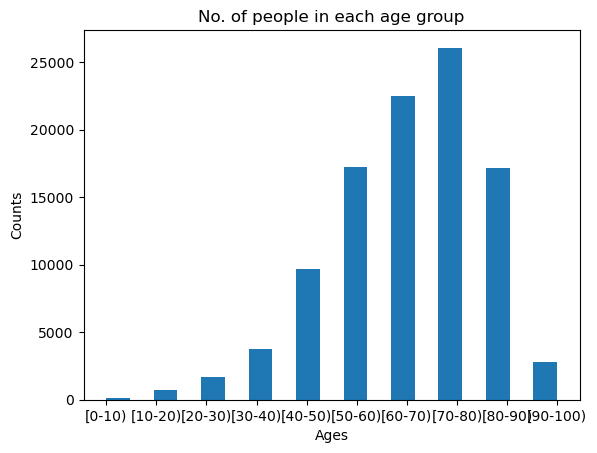

In [7]:
# no. of people in each age grp

fig, ax = plt.subplots()

plt.hist(diabetic_df['age'], 19, density = 0, alpha = 1)
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.title("No. of people in each age group")

print("The number of people in each range of age group")

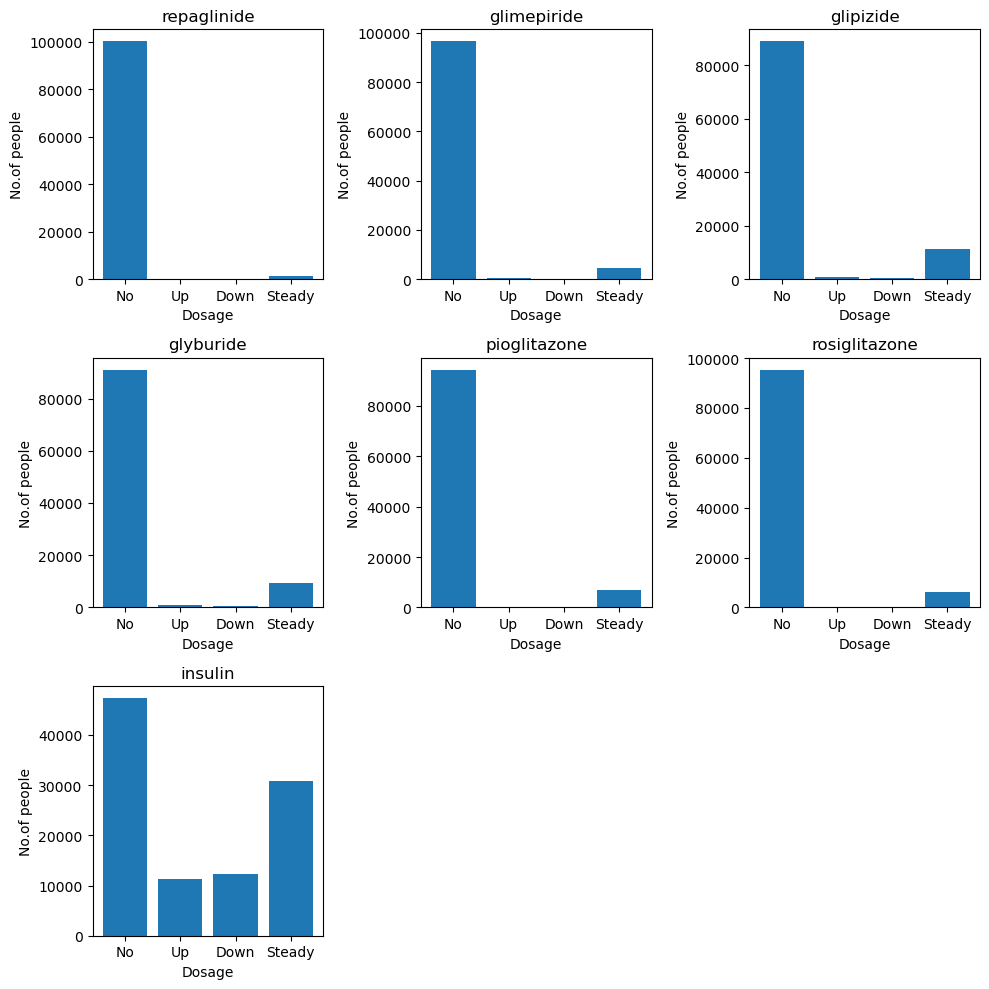

In [61]:
# finding the number of people who were administered with the diabetic medicine

diabetic_meds = ['repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
dose = ['No', 'Up', 'Down', 'Steady']

# types of medicine with types of dosage of each medicine
types_of_meds = [
    [repaglinide_no, repaglinide_up, repaglinide_down, repaglinide_steady],
    [glimepiride_no, glimepiride_up, glimepiride_down, glimepiride_steady],
    [glipizide_no, glipizide_up, glipizide_down, glipizide_steady],
    [glyburide_no, glyburide_up, glyburide_down, glyburide_steady],
    [pioglitazone_no, pioglitazone_up, pioglitazone_down, pioglitazone_steady],
    [rosiglitazone_no, rosiglitazone_up, rosiglitazone_down, rosiglitazone_steady],
    [insulin_no, insulin_up, insulin_down, insulin_steady]
]


# enumerate - built in function in python that allows to keep track of the number of loops in a loop
plt.figure(figsize=(10, 10))
for i, medication in enumerate(diabetic_meds):
    plt.subplot(3, 3, i + 1)
    plt.bar(dose, types_of_meds[i])
    plt.xlabel('Dosage') # dosage of the medicine if it is the same of inscreased or decreased
    plt.ylabel('No.of people') #total
    plt.title(medication)

plt.tight_layout()
plt.show()


<Axes: xlabel='race', ylabel='total'>

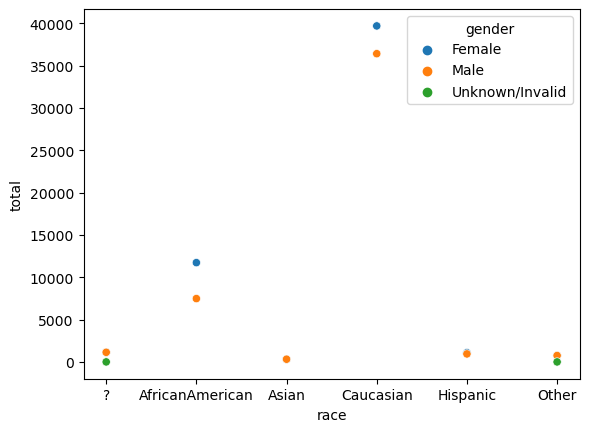

In [96]:
#race_And_Gender
# Finding the total of patients in each race category for male and female
sns.scatterplot(x = 'race', y = 'total',
                hue = 'gender', data = race_And_Gender)

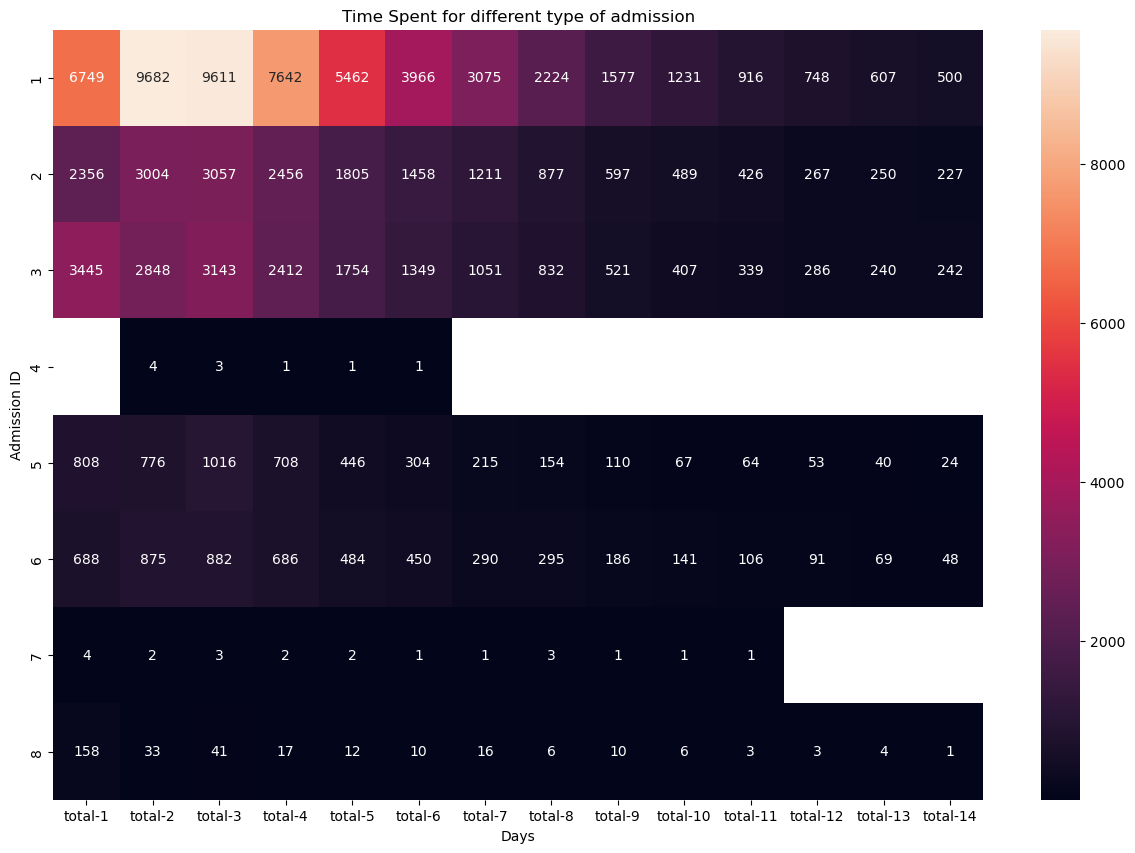

In [115]:
# Analysing the map for the time spent in hospital for different type of admission

admission_type = admission_time.pivot(index = ['admission_type_id'],
                                     columns = ['time_in_hospital'],
                                     values = ['total'])

plt.figure(figsize=(15,10))
sns.heatmap(admission_type, annot=True, fmt='.0f')
plt.title('Time Spent for different type of admission')
plt.xlabel('Days')
plt.ylabel('Admission ID')
plt.show()

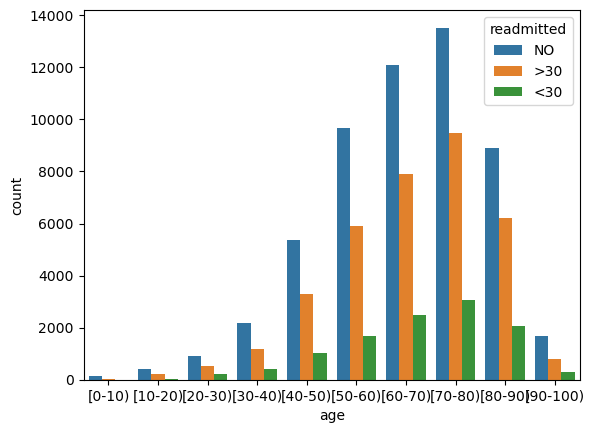

In [37]:
# rno = readmission and original
rno = sns.countplot(x = 'age', hue = 'readmitted', data = diabetic_df)

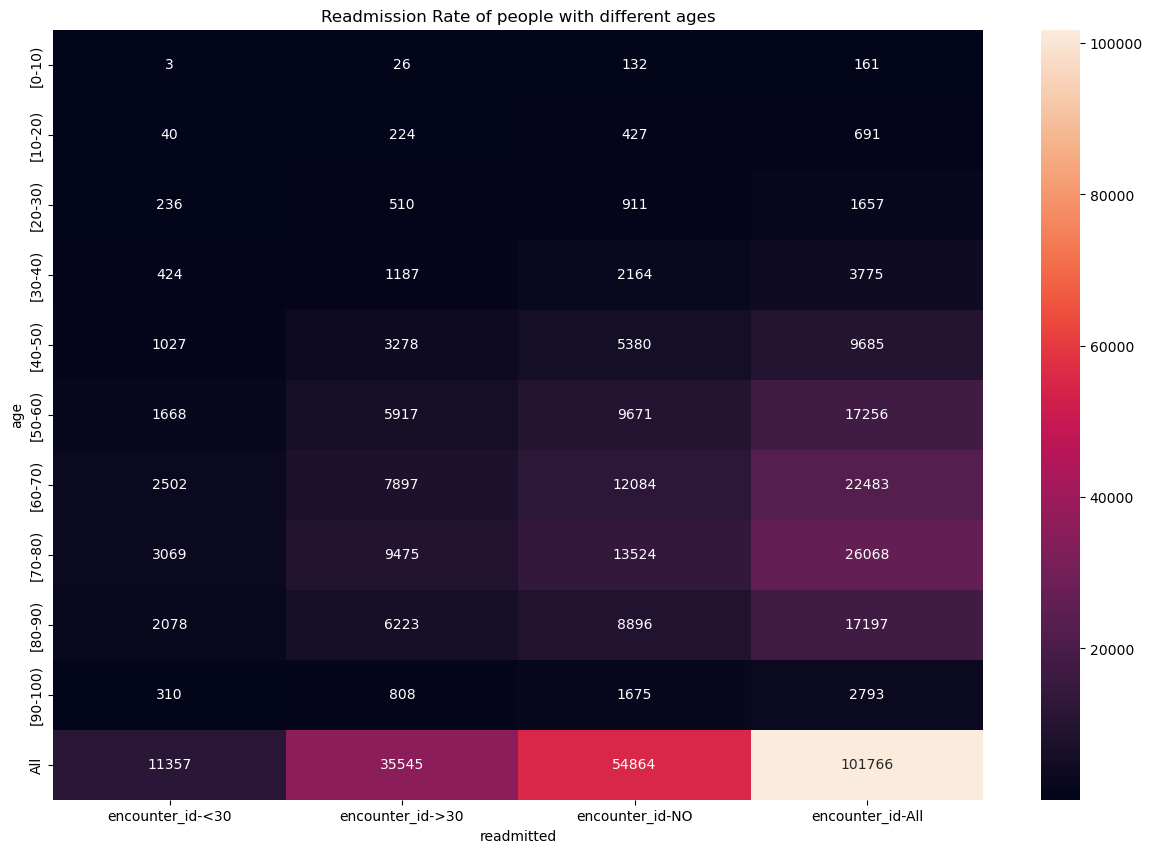

In [116]:
ages_df = diabetic_df.pivot_table(index = ['age'],
                     columns = ['readmitted'],
                     values = ['encounter_id'],
                     aggfunc=lambda x: len(x.unique()),
                     margins=True)

plt.figure(figsize=(15,10))
sns.heatmap(ages_df, annot=True, fmt = '.0f')
plt.title('Readmission Rate of people with different ages')
plt.xlabel('readmitted')
plt.ylabel('age')
plt.show()

## Summary

Through the exploratory data analysis, it is shown that for gender and race, **caucasian female** are more prone to get admitted for diabetes even though based on research male is more prone to get diabetes.
More people are being admitted for '**Emergency**' and spent more time at the hospitals compared to the other patients who get admitted for other types of admission.

Ad for readmission, the age range between 70-80 years old are more likely to get readmitted in <30 days and >30 days even though the majority of the same range and other age range patients won't be readmitted, but the number is still quite high.
Despite the change of medicine, it is still quite difficult to determine the cause of readmission as everyone have a different type of diabetes and a change of medicine could not 100% predict what caused the patients to be readmitted.


## References

SINGH.A(2019), _Diabetes 130-US hospitals 1999-2008 data set, Kaggle._ Available at: https://www.kaggle.com/datasets/singhanimesh16/diabetes-130us-hospitals-19992008-data-set?select=IDs_mapping.csv
(Accessed: 13 June 2023).

Clore.J._et al._(no date) _Diabetes 130-US hospitals for years 1999-2008, UCI Machine Learning Repository._ Available at: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008 (Accessed: 15 June 2023)
